Obejtivo :segmentar nossas bases de clientes de acordo com seus interesses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dados
df = pd.read_csv("dados_mkt.csv")
df.head(5)

,sexo,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
0,F,27,49,0,0,10,0,0,10,0,...,0,0,0,0,0,0,0,0,0,10
1,F,27,41,0,0,0,0,0,0,0,...,10,20,40,0,10,0,0,0,0,10
2,F,26,1,0,0,0,0,0,10,0,...,10,0,50,0,0,0,30,0,0,0
3,M,28,32,0,50,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
4,M,28,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0


os dados não são rotulados, vai ser feito a clusterização, que agrupa e segmenta o conjunto de dados com base em suas características e semelhanças.

**NOTA:**  A clusterização, também conhecida como agrupamento, é uma técnica de aprendizado de máquina que se enquadra na categoria de aprendizado não supervisionado. Essa técnica é usada para organizar um conjunto de objetos em grupos, de modo que os objetos dentro de cada grupo sejam mais semelhantes entre si do que com aqueles em outros grupos. Essa semelhança é determinada com base nas características dos objetos, que podem incluir medidas numéricas, categorias, ou até mesmo dados mais complexos como imagens ou documentos de texto.

In [3]:
#Verificar info dos dados para saber se os dados int sao int
df.info()
#Coluna de sexo esta como object provavelmente deve esta como F M vamos verifica as info desta celula e fazer a troca para 1 e 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sexo               12992 non-null  object
 1   idade              12992 non-null  int64 
 2   numero_de_amigos   12992 non-null  int64 
 3   basquete           12992 non-null  int64 
 4   futebol_americano  12992 non-null  int64 
 5   futebol            12992 non-null  int64 
 6   softbol            12992 non-null  int64 
 7   voleibol           12992 non-null  int64 
 8   natacao            12992 non-null  int64 
 9   animacao           12992 non-null  int64 
 10  beisebol           12992 non-null  int64 
 11  tenis              12992 non-null  int64 
 12  esportes           12992 non-null  int64 
 13  fofo               12992 non-null  int64 
 14  danca              12992 non-null  int64 
 15  banda              12992 non-null  int64 
 16  marcha             12992 non-null  int64

In [4]:
df["sexo"].unique()

array(['F', 'M', 'NE'], dtype=object)

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder  = OneHotEncoder(categories=[['F', 'M', 'NE']], sparse_output=False)  #Uso de matriz tradicional

In [6]:
#transformação
encoded_sexo = encoder.fit_transform(df[['sexo']])#colocando dentro de fit_transform nossa coluna categorica
encoded_sexo 
#agora estão completamente numéricos, variando entre 0 e 1

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], shape=(12992, 3))

In [7]:
#criando um dataframe para unir os dados,
#encoder.get_feature_names_out(), que nos permite obter os nomes das colunas correspondentes a cada uma dessas features.
encoded_df = pd.DataFrame(encoded_sexo, columns=encoder.get_feature_names_out(['sexo']))

In [8]:
#integrará o DataFrame recém-criado com o nosso DataFrame original
dados = pd.concat([df, encoded_df], axis=1).drop('sexo', axis=1)
dados 


,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,27,49,0,0,10,0,0,10,0,0,...,0,0,0,0,0,0,10,1.0,0.0,0.0
1,27,41,0,0,0,0,0,0,0,10,...,0,10,0,0,0,0,10,1.0,0.0,0.0
2,26,1,0,0,0,0,0,10,0,0,...,0,0,0,30,0,0,0,1.0,0.0,0.0
3,28,32,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,28,18,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,26,21,0,0,0,0,0,0,0,0,...,0,0,0,20,0,0,0,1.0,0.0,0.0
12988,26,50,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12989,27,32,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12990,27,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [9]:
#Transformando o objeto em um pkl
import joblib
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [10]:
#Utilização kmeans -proximidade por caracteristicas em bolhas, da a ideia de grupos de interceção
from sklearn.cluster import KMeans

mod_kmeans = KMeans(n_clusters=2, random_state=45)

In [11]:
#Criando modelo para ser utilizado
modelo = mod_kmeans.fit(dados)

**Resumo pratico:** Identificamos a necessidade de transformar a coluna 'sexo' em valores numéricas usando o OneHotEncoder. Após preparar os dados, treinamos um modelo de clustering com KMeans, definindo 2 clusters para agrupar os consumidores.

Utilizando 2 metricas o valor de inércia e o valor de silhueta.

A inércia é uma medida que nos permite avaliar a qualidade dos clusters, pois retorna a soma das distâncias ao quadrado entre os pontos dentro do cluster e seu centroide. Quanto menor a inércia, mais próximos estão esses valores e melhor estará o agrupamento.



In [12]:
# provavel q os agrupamentos que fizemos não têm boa qualidade, mas podemos confirmar essa suposição através do valor de silhueta.
mod_kmeans.inertia_

24912957.594588563

In [13]:
#A silhueta retorna o valor para a separação e coesão dos pontos dentro de um cluster
from sklearn.metrics import silhouette_score
silhouette_score(dados, mod_kmeans.predict(dados))

np.float64(0.3799715886302017)

In [14]:
#Teste para outro valor de cluster, incluindo o valor de inertia e cilhueta
def avaliacao(dados):
    inercia = []
    silhueta = []

    for k in range(2,21):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - '+ str(silhouette_score(dados, kmeans.predict(dados))))
        
    return silhueta, inercia

In [15]:
silhueta, inercia = avaliacao(dados)
silhueta

['k=2 - 0.3799715886302017',
 'k=3 - 0.2631947012216279',
 'k=4 - 0.27497370057197046',
 'k=5 - 0.2762790287828939',
 'k=6 - 0.2814107923103627',
 'k=7 - 0.19566339131554092',
 'k=8 - 0.12271514125212872',
 'k=9 - 0.1281093701405103',
 'k=10 - 0.13020718009107704',
 'k=11 - 0.13209306347804026',
 'k=12 - 0.09015815350273831',
 'k=13 - 0.09002551845716941',
 'k=14 - 0.08959066111262458',
 'k=15 - 0.09427696863257996',
 'k=16 - 0.09552364235312874',
 'k=17 - 0.09543714624178481',
 'k=18 - 0.08844412672288283',
 'k=19 - 0.0844173588143633',
 'k=20 - 0.08484109789709748']

independentemente dos valores de cluster que escolhermos para esse modelo, o resultado não melhorará muito além do que já analisamos

In [16]:
#Criando um gráfico de distribuição de silhuetas
#Alguns codigos foram utilizado em outras analises feitas em outros projeto como por exemplo projetos de visualização de dados
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados):
    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45)
    cluster_previsoes = kmeans.fit_predict(dados)
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados, cluster_previsoes)

    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
            facecolor=cor, edgecolor=cor, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

Valor médio para 2 clusters: 0.380


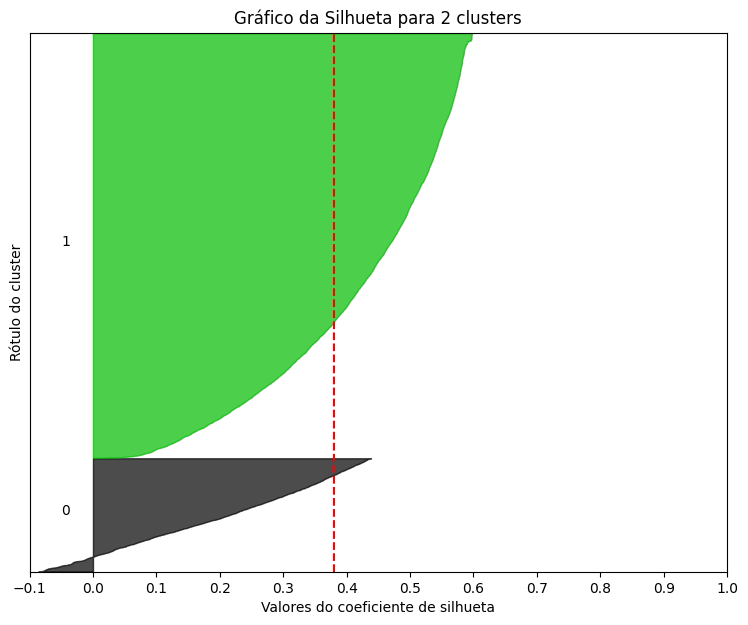

In [18]:
graf_silhueta(2,dados)

In [19]:
#Mais uma avanliação para saber se é o dado que nao esta ajustado, usando o método cotovelo para ver nosso ponto K ideal
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,21),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

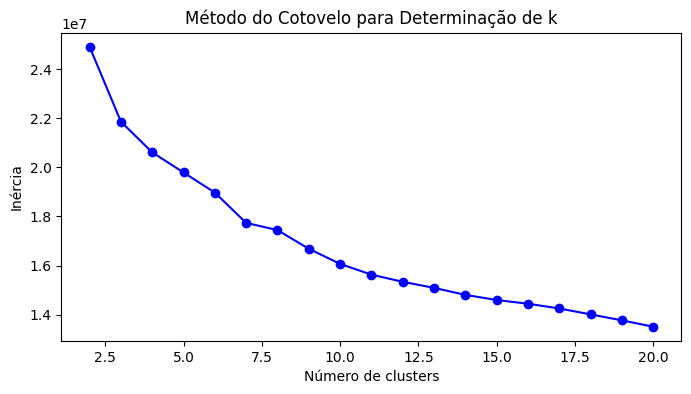

In [20]:
plot_cotovelo(inercia)

dados elevado a 1e7 vamos corrigir e fazer todo calculo novamente